# Image recognition 
- Classification with Random Forest algorithm
 

Given some X-ray images, use machine learning to help doctors detecting pneumonia.



# 1. Exploratory Data Analysis 

* Download the dataset Chest X-Ray Images (Pneumonia) 

In [ ]:

import os
import glob
import numpy as np
import pandas as pd

import seaborn as sns
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline

from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from PIL import Image
from pathlib import Path
from skimage.io import imread
from skimage.transform import resize

* Importing the dataset
* Creating objects data
* Creating a dataframe with the feature variables
* Viewing the top 5 rows and features of train data

In [2]:
# Get the path to the normal and pneumonia sub-directories
INPUT_PATH = './chest_Xray'

# Get the list of all the images
train_normal = Path(INPUT_PATH + '/train/NORMAL').glob('*.jpeg')
train_pneumonia = Path(INPUT_PATH + '/train/PNEUMONIA').glob('*.jpeg')

# Go through all the normal cases. The label for these cases will be 0 and 1
normal_data = [(image, 0) for image in train_normal]
pneumonia_data = [(image, 1) for image in train_pneumonia]

train_data = normal_data + pneumonia_data

# Get a pandas dataframe from the data we have in our list 
train_data = pd.DataFrame(train_data, columns=['image', 'label'])

train_data.head()

image  label
0  chest_Xray/train/NORMAL/NORMAL2-IM-0977-0001.jpeg      0
1          chest_Xray/train/NORMAL/IM-0578-0001.jpeg      0
2  chest_Xray/train/NORMAL/NORMAL2-IM-0479-0001.jpeg      0
3  chest_Xray/train/NORMAL/NORMAL2-IM-1183-0001.jpeg      0
4     chest_Xray/train/NORMAL/IM-0620-0001-0002.jpeg      0

In [3]:
 train_data.tail()
    

image  label
5211  chest_Xray/train/PNEUMONIA/person95_virus_177....      1
5212  chest_Xray/train/PNEUMONIA/person316_bacteria_...      1
5213  chest_Xray/train/PNEUMONIA/person1530_virus_26...      1
5214  chest_Xray/train/PNEUMONIA/person544_bacteria_...      1
5215  chest_Xray/train/PNEUMONIA/person782_bacteria_...      1

In [4]:
# Shuffle the data  
train_data = train_data.sample(frac=1., random_state=100).reset_index(drop=True)

train_data.head(10)

image  label
0  chest_Xray/train/PNEUMONIA/person72_bacteria_3...      1
1  chest_Xray/train/PNEUMONIA/person1609_bacteria...      1
2  chest_Xray/train/PNEUMONIA/person569_virus_111...      1
3  chest_Xray/train/PNEUMONIA/person847_bacteria_...      1
4  chest_Xray/train/PNEUMONIA/person1087_virus_17...      1
5  chest_Xray/train/PNEUMONIA/person281_bacteria_...      1
6  chest_Xray/train/NORMAL/NORMAL2-IM-1111-0001.jpeg      0
7  chest_Xray/train/PNEUMONIA/person1314_virus_22...      1
8  chest_Xray/train/PNEUMONIA/person1119_virus_18...      1
9  chest_Xray/train/PNEUMONIA/person564_bacteria_...      1

In [5]:
 print(train_data)
    

                                                  image  label
0     chest_Xray/train/PNEUMONIA/person72_bacteria_3...      1
1     chest_Xray/train/PNEUMONIA/person1609_bacteria...      1
2     chest_Xray/train/PNEUMONIA/person569_virus_111...      1
3     chest_Xray/train/PNEUMONIA/person847_bacteria_...      1
4     chest_Xray/train/PNEUMONIA/person1087_virus_17...      1
5     chest_Xray/train/PNEUMONIA/person281_bacteria_...      1
6     chest_Xray/train/NORMAL/NORMAL2-IM-1111-0001.jpeg      0
7     chest_Xray/train/PNEUMONIA/person1314_virus_22...      1
8     chest_Xray/train/PNEUMONIA/person1119_virus_18...      1
9     chest_Xray/train/PNEUMONIA/person564_bacteria_...      1
10    chest_Xray/train/PNEUMONIA/person27_bacteria_1...      1
11    chest_Xray/train/PNEUMONIA/person472_bacteria_...      1
12    chest_Xray/train/PNEUMONIA/person371_bacteria_...      1
13    chest_Xray/train/PNEUMONIA/person515_virus_103...      1
14            chest_Xray/train/NORMAL/IM-0460-0001.jpeg

# 2. Preprocessing : train-validation-test procedure 

Total :  5216
1    3875
0    1341
Name: label, dtype: int64


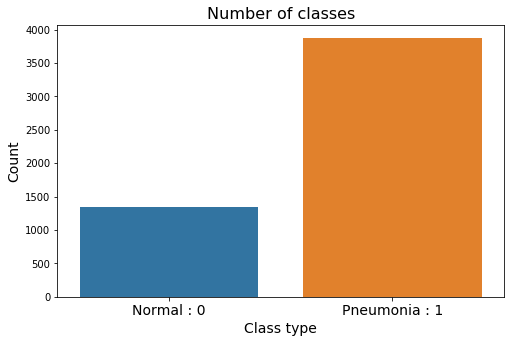

In [6]:

import seaborn as sns
import seaborn as sns


# Get the counts for each class
count_result = train_data['label'].value_counts()
print('Total : ', len(train_data))
print(count_result)

# Plot the results 
plt.figure(figsize=(8,5))
sns.countplot(x = 'label', data =  train_data)
plt.title('Number of classes', fontsize=16)
plt.xlabel('Class type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(range(len(count_result.index)), 
           ['Normal : 0', 'Pneumonia : 1'], 
           fontsize=14)
plt.show()

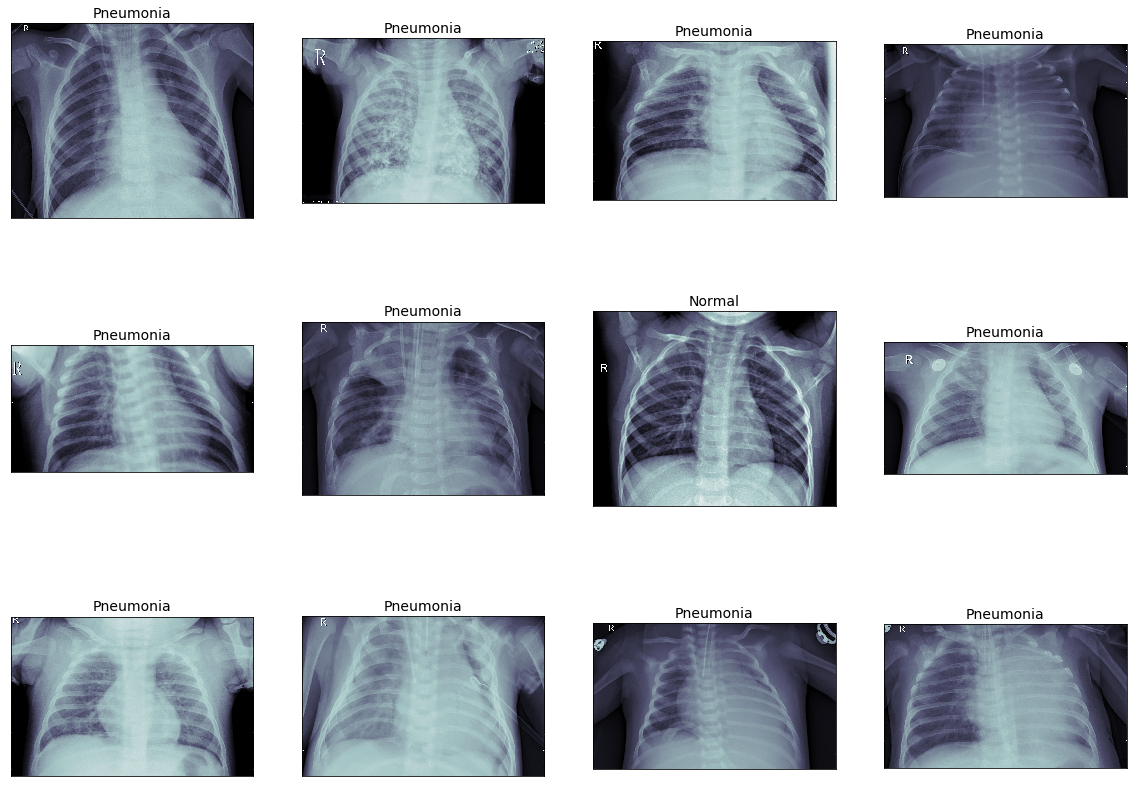

In [7]:
fig, ax = plt.subplots(3, 4, figsize=(20,15))
for i, axi in enumerate(ax.flat):
    image = imread(train_data.image[i])
    axi.imshow(image, cmap='bone')
    axi.set_title('Normal' if train_data.label[i] == 0 else 'Pneumonia',
                  fontsize=14)
    axi.set(xticks=[], yticks=[])
    

In [8]:
train_data.shape


(5216, 2)

In [9]:
 import cv2
    

In [10]:
def data_input(dataset):
    for image in dataset:
        im = cv2.imread(str(image))
        im = cv2.resize(im, (224,224))
        if im.shape[2] == 1:
            im = np.dstack([im, im, im])
        x_image = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        x_image = x_image.astype(np.float32)/255.
        return x_image

In [11]:
def load_data(files_dir='/train'):
    # list of the paths of all the image files
    normal = Path(INPUT_PATH + files_dir + '/NORMAL').glob('*.jpeg')
    pneumonia = Path(INPUT_PATH + files_dir + '/PNEUMONIA').glob('*.jpeg')

    # --------------------------------------------------------------
    # Data-paths' format in (img_path, label) 
    # labels : for [ Normal cases = 0 ] & [ Pneumonia cases = 1 ]
    # --------------------------------------------------------------
    normal_data = [(image, 0) for image in normal]
    pneumonia_data = [(image, 1) for image in pneumonia]

    image_data = normal_data + pneumonia_data

    # Get a pandas dataframe for the data paths 
    image_data = pd.DataFrame(image_data, columns=['image', 'label'])
    
    # Shuffle the data 
    image_data = image_data.sample(frac=1., random_state=100).reset_index(drop=True)
    
    # Importing both image & label datasets...
    x_images, y_labels = ([data_input(image_data.iloc[i][:]) for i in range(len(image_data))], 
                         [image_data.iloc[i][1] for i in range(len(image_data))])

    # Convert the list into numpy arrays
    x_images = np.array(x_images)
    x_images = x_images.reshape(x_images.shape[0],x_images.shape[1]*x_images.shape[2]*x_images.shape[3])
    y_labels = np.array(y_labels)
    
    print("Total number of images: ", x_images.shape)
    print("Total number of labels: ", y_labels.shape)
    
    return x_images, y_labels

In [12]:
x_train, y_train = load_data(files_dir='/train')

print(x_train.shape)
print(y_train.shape)

Total number of images:  (5216, 150528)
Total number of labels:  (5216,)
(5216, 150528)
(5216,)


In [13]:
 x_train[0].shape

(150528,)

In [14]:
x_test, y_test = load_data(files_dir='/test')
print(x_test.shape)
print(y_test.shape)

Total number of images:  (624, 150528)
Total number of labels:  (624,)
(624, 150528)
(624,)


In [15]:
x_val, y_val = load_data(files_dir='/val')

print(x_val.shape)
print(y_val.shape)

Total number of images:  (16, 150528)
Total number of labels:  (16,)
(16, 150528)
(16,)


# 3. Modelling 

In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# model = RandomForestClassifier(n_estimators=1000)
# model.fit(x_train, y_train)


In [20]:
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=0)
                           



In [21]:
# Hyperparameters for the cross validation
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# 4. Cross Validation procedure and optimisation

In [22]:
# Running GridSearchCV using multiple evaluation metrics
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)


In [37]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_features': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
# Best parameters
CV_rfc.best_params_


{'max_features': 'auto', 'n_estimators': 500}

In [39]:
# Best score 
CV_rfc.best_score_


0.9593558282208589

# 5. Training

In [40]:
# Creating a model with best hyperparameters issued from the cross validation
rfc1=RandomForestClassifier(random_state=0, max_features='auto', n_estimators= 500, max_depth=None, criterion='gini')

In [41]:
# Training the classifier
rfc1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

# 6. Prediction

In [42]:
# Applying the trained classifier to the test
pred=rfc1.predict(x_test)

In [43]:
from sklearn import metrics

print(metrics.classification_report(pred, y_test))

             precision    recall  f1-score   support

          0       0.34      0.96      0.50        83
          1       0.99      0.72      0.83       541

avg / total       0.91      0.75      0.79       624



In [44]:
from sklearn.metrics import accuracy_score

print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred))


Accuracy for Random Forest on CV data:  0.7483974358974359


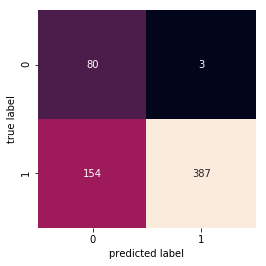

In [46]:
# Creating confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.xlabel('predicted label')
plt.ylabel('true label');